# Scanning documents using OpenCV

In this notebook, we will learn how to scan documents using OpenCV. <br>
This is part of my assignment for the course "Implementations" at the Baden-Württemberg Cooperative State University. <br>
Goal of this assignment is to demonstrate a practical application of a python library of our choice. <br>
I chose OpenCV because I am interested in image processing and I think it is a very useful library. <br>


We will use the following steps:

## 1. Setup:
---
First off we have to install the required packages and import them. We will use the following packages: <br>
  * Opencv to perform out image processing tasks
  * Pillow and IPython show our images 

Then we test if they are installed correctly by printing the version of the packages.
If everything is installed correctly, we can start with the next step.


In [1]:
import cv2
from PIL import Image
from IPython.display import display

import numpy as np

print(f"OpenCV version:  {cv2.__version__}")
print(f"Pillow version:  {Image.__version__}")
!jupyter --version


OpenCV version:  4.6.0
Pillow version:  9.0.1
Selected Jupyter core packages...
IPython          : 8.5.0
ipykernel        : 6.15.2
ipywidgets       : 8.0.2
jupyter_client   : 7.3.5
jupyter_core     : 5.1.0
jupyter_server   : 1.23.3
jupyterlab       : not installed
nbclient         : 0.7.2
nbconvert        : 7.2.5
nbformat         : 5.7.0
notebook         : 6.5.2
qtconsole        : 5.4.0
traitlets        : 5.3.0


# 2. Loading the images:
---
1. We load the `test.jpg` image using the `cv2.imread()` function.
*    The `cv2.imread()` reads a given file and returns a Matrix of color values into a variable named img, which is a numpy array. 
*    This matrix is a 3D matrix, where the first two dimensions are the height and width of the image and the third dimension is the color channel.
*    The color channel is a 3D vector, which contains the color values for the red, green and blue channel.
*    The color values are stored as 8 bit unsigned integers, which means that the values range from 0 to 255.
*    The image is loaded in the BGR color space, which means that the color values are stored in the order blue, green, red.
*    The `cv2.imread()` function has a second parameter, which specifies the color space in which the image should be loaded.
*    The default value is `cv2.IMREAD_COLOR`, which loads the image in the BGR color space.
*    If we want to load the image in the RGB color space, we have to set the second parameter to `cv2.IMREAD_COLOR`.
*    If we want to load the image in grayscale, we have to set the second parameter to `cv2.IMREAD_GRAYSCALE`.
*    But we will keep the image in the BGR color space for now so we can show how to convert colorspaces later....


> OpenCV also provides the imshow() function to display the image. However, this function is not supported in Jupiter notebook. So we use the display() function instead.

In [2]:
img = cv2.imread('./contract.jpg')
# Image taken from https://learnopencv.com/wp-content/uploads/2022/07/Original-Form-2.jpg on the 28th of November 2022

2. We convert the image to grayscale using the `cv2.cvtColor()` function.
*    The `cv2.cvtColor()` function converts the image from one color space to another.
*    The first parameter is the image, which should be converted.
*    The second parameter is the color space to which the image should be converted.
*    The color space is specified using the `cv2.COLOR_XX2XX` constant.
     *    In the example we convert the image from the BGR color space to the grayscale color space.
*    The `cv2.cvtColor()` function returns the converted image which we store in the `gray` variable.

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

3. We resize the image to a width of 600x800 using the `cv2.resize()` function, in order to better visualize it in the Jupiter notebook.
*    The `cv2.resize()` function has two parameters, the first one is the image and the second one is the new size of the image.
*    The new size of the image is a tuple, which contains the width and height of the image. In our case the width is 400 and the height is 600.
*    The `cv2.resize()` function returns a new image with the new size into the `resized` variable.

In [4]:
resized = cv2.resize(grey, (420, 560))


4. We then display the image using the `display()` function.
*    The `display()` function takes a numpy array as input and displays it as an image.
*    The `display()` function is a wrapper around the `Image.fromarray()` function from the Pillow package.
*    The `Image.fromarray()` function takes a numpy array as input and returns a Pillow image object.
*    The `IPython.display.display()` function then takes a Pillow image object as input and displays it.

> Please note that the display() function is part of the IPython package and not the OpenCV package.<br>
> The display() function is only available in the Jupiter notebook and not in the Python interpreter.

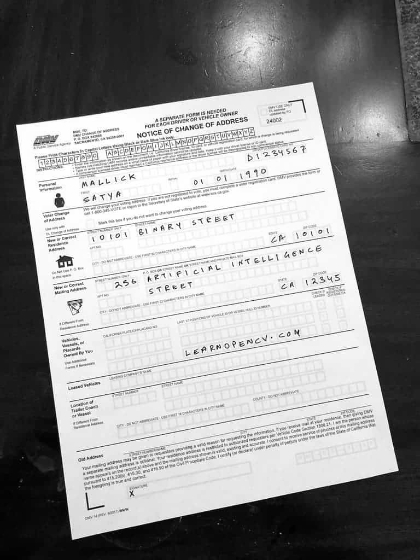

In [5]:
display(Image.fromarray(resized))

# 3. Preprocessing:
---
To be able to better work with the image, we have to preprocess it. We will use the following steps:

1. First we blur the image using the `cv2.GaussianBlur()` function. This will reduce the noise in the image and make it easier to detect the edges, which we will use later to find the corners of the document.
    *   The `cv2.GaussianBlur()` function takes three parameters, the first one is the image, the second one is the size of the kernel and the third one is the standard deviation in the x direction.
    *   As original image we use the grayscale image, which we created in the previous step in its original size.
    *   The size of the kernel is a tuple, which contains the width and height of the kernel. In our case the width is 5 and the height is 5.
        *   A kernel is a matrix, which is used to perform a convolution on the image. The bigger the kernel, the more the image will be blurred.
    *   The standard deviation in the x direction is a value, which specifies how much the kernel should be blurred in the x direction.
    *   We set the standard deviation in the x direction to 0, which means that the kernel will not be blurred in the x direction.
    *   The `cv2.GaussianBlur()` function returns a new image, which we store in the `blurred` variable.

We then display a smaller version of the image using the `display()` function.

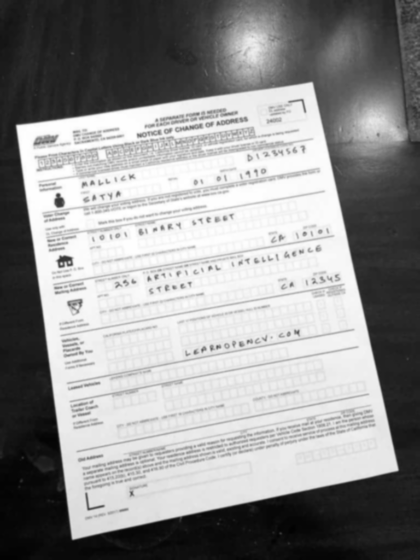

In [6]:
blurred = cv2.GaussianBlur(grey, (7, 7), 0)
display(Image.fromarray(cv2.resize(blurred, (420, 560))))

2. We then apply the Canny edge detection algorithm to the blurred image using the `cv2.Canny()` function. This will detect the edges in the image.
    *   The `cv2.Canny()` function takes three parameters, the first one is the image, the second one is the threshold for the minimum value and the third one is the threshold for the maximum value.
    *   As original image we use the blurred image, which we created in the previous step.
    *   The threshold for the minimum value is a value, which specifies the minimum value for an edge. In our case we set the minimum value to 75.
    *   The threshold for the maximum value is a value, which specifies the maximum value for an edge. In our case we set the maximum value to 200.
    *   The `cv2.Canny()` function returns a new image, which we store in the `edged` variable.
    
*  The Canny edge detection works as follows:
    *   First the image is blurred using a Gaussian blur.
    *   Then the gradient of the image is calculated in the x and y direction.
    *   The gradient is then used to calculate the direction and the magnitude of the gradient.
    *   Then all pixels with a magnitude lower than the minimum threshold are discarded.
    *   All pixels with a magnitude higher than the maximum threshold are marked as strong edges.
    *   Then all pixels with a magnitude between the minimum and maximum threshold are marked as weak edges.
    *   Then all weak edges are discarded, which are not connected to a strong edge.
    *   The remaining weak edges are discarded, which are not connected to a strong edge.
<br><br>
*   We then display a smaller version of the image using the `display()` and the `cv2.resize()` function.

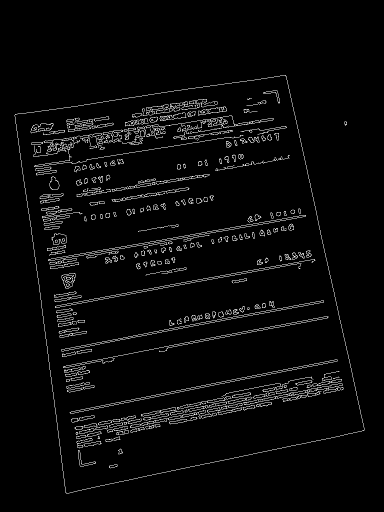

In [7]:
edged = cv2.Canny(blurred, 75, 200)
display(Image.fromarray(cv2.resize(edged, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)))

4. We then find the contours in the image using the `cv2.findContours()` function. This will find the contours in the image.
    *   The `cv2.findContours()` function takes three parameters, the first one is the image, the second one is the contour retrieval mode and the third one is the contour approximation method.
    *   As original image we use the edged image, which we created in the previous step.
    *   The contour retrieval mode is a value, which specifies how the contours should be retrieved. In our case we set the contour retrieval mode to `cv2.RETR_LIST`.
    *   The contour approximation method is a value, which specifies how the contours should be approximated. In our case we set the contour approximation method to `cv2.CHAIN_APPROX_SIMPLE`.
    *   The `cv2.findContours()` function returns a tuple, which contains the contours and the hierarchy.
    *   The contours are stored in the `contours` variable.
    *   The hierarchy is stored in the `hierarchy` variable.
<br><br>
5. We then sort the contours in order of their size using the `sorted()` function.
    *   The `sorted()` function takes two parameters, the first one is the list, which should be sorted and the second one is a key function, which is used to sort the list.
    *   As list we use the contours, which we created in the previous step.
    *   As key function we use the `cv2.contourArea()` function, which calculates the area of the contour.
    *   The `sorted()` function returns a new list, which is sorted in descending order.
    *   We then store the sorted list in the `page` variable.
<br><br>
6. This list contains the contours in descending order of their size. The first contour in the list is the contour of the document. We then draw the contour of the document on the original image using the `cv2.drawContours()` function.
    *   The `cv2.drawContours()` function takes five parameters, the first one is the image, the second one is the contours, the third one is the contour index, the fourth one is the color and the fifth one is the thickness of the contour.
    *   As original image we use a copy of the rezised image, which we created in the first step. but convert it to the BGR color space using the `cv2.cvtColor()` function. So we can show a colored contour.
    *   As contours we use the page, which we created in the previous step.
    *   As contour index we set the contour index to -1, which means that all contours should be drawn.
    *   The `cv2.drawContours()` function returns a new image, which we store in the `contoured` variable.


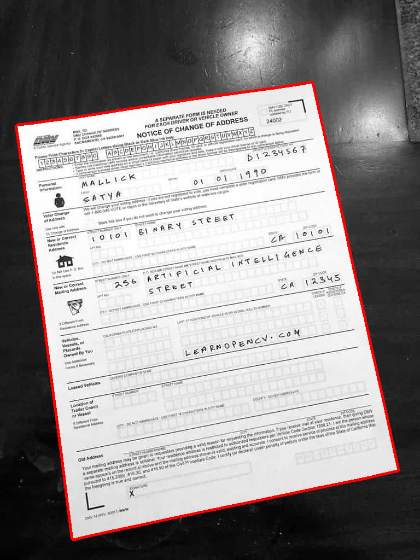

In [8]:

# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Sorting the contours based on their area in descending order.
page = sorted(contours, key=cv2.contourArea)[-1]

# drawing the contours on the original image.
base_image = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)
contoured = cv2.drawContours(base_image, page, -1, (255,0,0), 3)

display(Image.fromarray(cv2.resize(contoured, (420, 560)))) 

7. Now that we have the contour of the document, we can use the `cv2.approxPolyDP()` function to find the corners of the document.
    *   The `cv2.approxPolyDP()` function takes three parameters, the first one is the contour, the second one is the approximation accuracy and the third one is a boolean value, which specifies if the contour should be closed.
    *   As contour we use the first contour in the page, which we created in the previous step.
    *   The approximation accuracy is a value, which specifies how accurate the corners should be. In our case we set the approximation accuracy to 0.02 times the arc length of the contour.
    *   The `cv2.approxPolyDP()` function returns a new contour, which we store in the `approx` variable.


In [9]:
peri = cv2.arcLength(page, True)
approx = cv2.approxPolyDP(page, 0.05 * peri, True)

8. We then label the corners of the document using the `cv2.putText()` function.
    *   The `cv2.putText()` function takes seven parameters, the first one is the image, the second one is the text, the third one is the position of the text, the fourth one is the font, the fifth one is the font scale, the sixth one is the color and the seventh one is the thickness of the text.
    *   As base image we use the contoured image, which we created in the previous step.
    *   As text we use the letters A, B, C and D.
    *   As position of the text we use the coordinates of the corner.
    *   As font we use the `cv2.FONT_HERSHEY_SIMPLEX` font.
    *   As font scale we set the font scale to 1.
    *   As color we set the color to Green.
    *   the `cv2.putText()` function returns a new image, which we store in place of the contoured image.

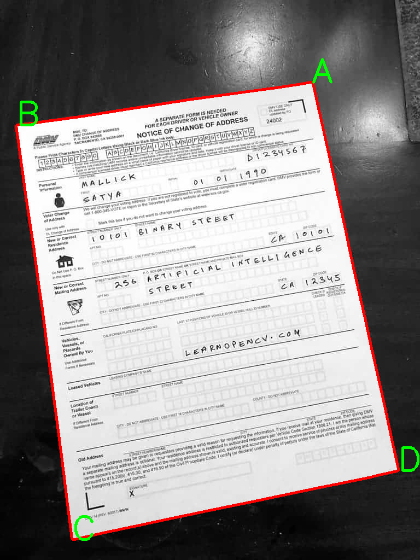

In [10]:
for index, c in enumerate(approx):
    character = chr(65 + index)
    cv2.putText(contoured, character, tuple(c[0]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4)

display(Image.fromarray(cv2.resize(contoured, (420, 560))))

9. To properly transform the image, we need to know the width and the height of the document in seen from a top down perspective.
    We can calculate the width and the height of the document using the `cv2.norm()` function.
    *   The `cv2.norm()` function takes two parameters, the first one is the first point and the second one is the second point.
    *   As first point we use the first corner of the document.
    *   As second point we use the second corner of the document.
    *   The `cv2.norm()` function returns the distance between the two points.
    *   We then store the distance in the `width` variables.
  
    We then repeat the same process for the height of the document and store the four resulting corners of the document in the `destination_corners` variable.

In [11]:
# rearranging the co-ordinates in the order of top-left, top-right, bottom-right, bottom-left.
(tl, tr, br, bl) = approx[0][0], approx[1][0], approx[2][0], approx[3][0]

# Finding the maximum width.
widthA = cv2.norm(br, bl)
widthB = cv2.norm(tr, tl)
maxWidth = max(int(widthA), int(widthB))

# Finding the maximum height.
heightA = cv2.norm(tr, br)
heightB = cv2.norm(tl, bl)
maxHeight = max(int(heightA), int(heightB))

# Final destination co-ordinates.
destination_corners = [[0, 0], [maxWidth, 0], [maxWidth, maxHeight], [0, maxHeight]]

10. We then calculate the perspective transform matrix using the `cv2.getPerspectiveTransform()` function.
    *   The `cv2.getPerspectiveTransform()` function takes two parameters, the first one is the source corners and the second one is the destination corners.
    *   As source corners we use the `approx` variable, which we created in the previous step.
    *   As destination corners we use the `destination_corners` variable, which we created in the previous step.
    *   The `cv2.getPerspectiveTransform()` function returns the perspective transform matrix, which we store in the `matrix` variable.
    
    A perspective transform matrix is a 3x3 matrix, which can be used to transform a point in a 2D space to another point in a 2D space. We need this matrix to transform the document to a top down perspective by warping the image so it fits with the destination corners.

In [12]:
matrix = cv2.getPerspectiveTransform(np.float32(approx), np.float32(destination_corners))

11. Now that we have the perspective transform matrix, we can use the `cv2.warpPerspective()` function to transform the image to a top down perspective.
    *   The `cv2.warpPerspective()` function takes four parameters, the first one is the image, the second one is the perspective transform matrix, the third one is the size of the destination image and the fourth one is the flags.
    *   As image we use the original image, which we created in the first step.
    *   As perspective transform matrix we use the `matrix` variable, which we created in the previous step.
    *   As size of the destination image we use the width and the height of the document, which we calculated in the previous step.
    *   As flags we set the flags to `cv2.INTER_CUBIC`.
    *   The `cv2.warpPerspective()` function returns a new image, which we store in the  variable.

In [13]:
warped = cv2.warpPerspective(img, matrix, (destination_corners[2][0], destination_corners[2][1]), flags=cv2.INTER_CUBIC)

12. As the current image is mirrored, we can use the `cv2.flip()` function to flip the image horizontally.
    *   The `cv2.flip()` function takes two parameters, the first one is the image and the second one is the flip code.
    *   As image we use the image, which we created in the previous step.
    *   As flip code we set the flip code to 1, which means that the image should be flipped horizontally.
    *   The `cv2.flip()` function returns a new image, which we store in the `flipped` variable.

In [14]:
flipped = cv2.flip(warped, 1)

13. ### Yaay 🎉🎉 We are done with the preprocessing,
    As seen in the image below, the document is now in a top down perspective and is ready to be processed by the OCR.

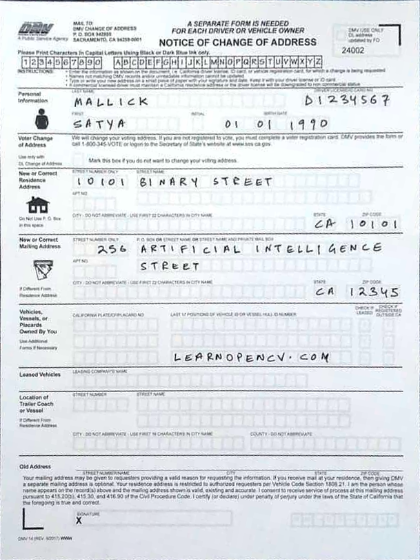

In [15]:
display(Image.fromarray(cv2.resize(flipped, (420, 560))))

14. But for now we will stop here, as we will continue with the OCR some other time.... :D
    The only thing left to do is to save the image, which we can do using the `cv2.imwrite()` function.
    *   The `cv2.imwrite()` function takes two parameters, the first one is the file name and the second one is the image.
    *   As file name we use the `output` variable, which we created in the first step.
    *   As image we use the `flipped` variable, which we created in the previous step.
    *   The `cv2.imwrite()` function returns a boolean value, which indicates if the image was saved successfully.

In [16]:
cv2.imwrite('scanned.jpg', flipped)

True

### Sources 
###### https://dontrepeatyourself.org/post/learn-opencv-by-building-a-document-scanner/
###### https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html
###### https://pyimagesearch.com/2020/09/07/ocr-a-document-form-or-invoice-with-tesseract-opencv-and-python/
###### https://learnopencv.com/automatic-document-scanner-using-opencv/